# Computing mass and charge density on each axis

Here we compute the mass and charge density of water along the three cartesian axes of a fixed-volume unit cell (i.e. from a simulation in the NVT ensemble). 

**Last updated:** December 2022 with MDAnalysis 2.4.0-dev0

**Minimum version of MDAnalysis:** 0.17.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests


In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import waterPSF, waterDCD
from MDAnalysis.analysis import lineardensity as lin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we are working with are a cube of water.

In [2]:
u = mda.Universe(waterPSF, waterDCD)

/home/pbarletta/mambaforge/envs/mda-user-guide/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behaviour will be changed in 3.0 to be the same as other readers
  warnings.warn("DCDReader currently makes independent timesteps"


`MDAnalysis.analysis.lineardensity.LinearDensity` ([API docs](https://docs.mdanalysis.org/stable/documentation_pages/analysis/lineardensity.html#MDAnalysis.analysis.lineardensity.LinearDensity)) will partition each of your axes into bins of user-specified `binsize` (in angstrom), and give the average mass density and average charge density of your atom group selection. 

This analysis is only suitable for a trajectory with a fixed box size. While passing a trajectory with a variable box size will not raise an error, `LinearDensity` will not account for changing dimensions. It will only evaluate the density of your atoms in the bins created from the trajectory frame when the class is first initialised.

Below, we iterate through the trajectory to verify that its box dimensions remain constant.

In [3]:
for ts in u.trajectory:
    print(ts.dimensions)

[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]
[50. 50. 50. 90. 90. 90.]


You can choose to compute the density of individual atoms, residues, segments, or fragments (groups of bonded atoms with no bonds to any atom outside the group). By default, the grouping is for `atoms`. 

In [4]:
density = lin.LinearDensity(u.atoms,
                            grouping='atoms').run()

The results of the analysis are in `density.results`.

In [5]:
density.nbins

200

In [6]:
density.results['x']['mass_density']

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00053562, 0.00080344, 0.00876945, 0.03507781, 0.00107125,
       0.00348155, 0.00241031, 0.02791523, 0.04277601, 0.01753

In [7]:
density.results['x'].keys()

KeysView({'dim': 0, 'slice_volume': 625.0, 'mass_density': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00053562, 0.00080344, 0.00876945, 0.03507781, 0.00107125,
   

In [8]:
density.results['y']['dim']

1

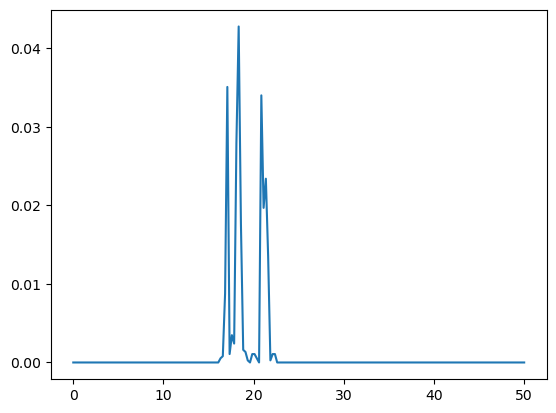

In [9]:
plt.plot(np.linspace(0, 50, 200), density.results['x']['mass_density']);

## References

[1] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[2] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.